In [22]:
import pandas as pd
from matplotlib import *
from sklearn.linear_model import LinearRegression
#from sklearn import svm
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn import cross_validation
dataTrain = pd.read_csv("dataTrain.csv")
dataTest = pd.read_csv("dataTest.csv")

In [25]:
dataTrain

,Crop Name,Area Name,Area of Land in acres,Amount of Production in Tons,Year
0,Amon,Dhaka,765390,312720,1969
1,Amon,Kishoregonj,588140,251340,1969
2,Amon,Mymensingh,1501670,687190,1969
3,Amon,Tangail,0,0,1969
4,Amon,Faridpur,786200,303645,1969
5,Amon,Chittagong,497290,319075,1969
6,Amon,Chittagong H. T.,57280,38140,1969
7,Amon,Noakhali,726660,332125,1969
8,Amon,Comilla,976420,508305,1969
9,Amon,Sylhet,1223850,629510,1969


In [26]:
dataTest

,Crop Name,Area Name,Area of Land in acres,Amount of Production in Tons,Year
0,Aus,Bakergonj,470150,181155,1969
1,Aus,Bogra,286080,95240,1969
2,Aus,Chittagong,264775,121470,1969
3,Aus,Chittagong H.T.,128710,60160,1969
4,Aus,Comilla,566325,224045,1969
5,Aus,Dhaka,499125,185035,1969
6,Aus,Dinajpur,484460,187185,1969
7,Aus,Faridpur,577015,164925,1969
8,Aus,Jessore,636155,214345,1969
9,Aus,Khulna,119700,49115,1969


In [27]:
x_train = dataTrain[['Area of Land in acres','Year']]#.reshape(-1,2)
x = x_train.values
#x_train = x_train.reshape(-1,2)
y_train = dataTrain['Amount of Production in Tons']
y = y_train.values
x_test = dataTest[['Area of Land in acres','Year']]#.reshape(-1,2)
y_test = dataTest['Amount of Production in Tons']

In [31]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.3)
clf = LinearRegression()
#clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
#clf = AdaBoostClassifier()
#clf = svm.SVR(kernel = 'poly')
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(x_train, y_train)
accuracy= clf.score(x_test, y_test)
print("The accuracy of the Crop Production is:", accuracy)
print("Prediction for the Test set is:")
print( clf.predict(x_test) )
#print( clf.predict(y_test) )
print("Lets Compare it to the original target test set:")
print(y_test)


The accuracy of the Crop Production is: 0.7318674414040371
Prediction for the Test set is:
[ 9.45047210e+05  2.45559118e+05  1.08700487e+05  1.90797502e+05
  2.37767027e+05  1.80109072e+05  5.73638484e+04  1.36811567e+05
  4.14201064e+05  4.14062101e+05 -2.50883165e+05  1.18344516e+05
  5.86774760e+05  3.96864389e+05  4.93404170e+05  1.85556332e+05
  5.75404697e+05  8.95450993e+04  1.40822014e+06  1.63537483e+05
  2.44303079e+05  4.92233055e+05  1.95013794e+05  3.33270633e+05
  9.92734727e+04  1.67898569e+05  1.94528094e+05  4.00853143e+05
  6.03275552e+05  1.76516562e+05  2.86451984e+04  2.47191086e+05
  2.61969442e+04  1.00398214e+05  2.47300250e+04  7.33278399e+03
  4.31287563e+05  3.05896693e+05  4.93488132e+05  2.55067798e+05
  5.72828074e+05  2.69349219e+04  3.75108572e+04  2.38101369e+04
  1.88963282e+05  5.83604598e+05 -1.72468528e+03  3.67681085e+05
  5.30455568e+05  1.52151137e+05  7.94699096e+04  1.18488678e+05
  4.74635538e+04  1.27421241e+05  2.06701214e+05  1.50450322e+06

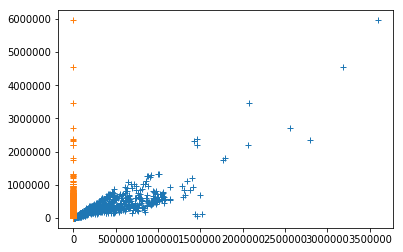

In [16]:
import matplotlib.pyplot as plt
#plt.plot(x_train,y_train,"*") 
plt.plot(x_test,y_test,"+") 
plt.show()